*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-01-13 06:06:31--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-01-13 06:06:31 (157 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Data Preprocessing and Train-Test Split

In [ ]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset = pd.get_dummies(dataset)
del dataset['sex_female']
del dataset['smoker_no']
del dataset['region_southwest']

In [ ]:
dataset.corr()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
age,1.000000,0.109341,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642
bmi,0.109341,1.000000,0.012645,0.198576,0.046380,0.003968,-0.138091,-0.135992,0.270144
children,0.042469,0.012645,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066
expenses,0.299008,0.198576,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982
sex_male,-0.020856,0.046380,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117
smoker_yes,-0.025019,0.003968,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498
region_northeast,0.002475,-0.138091,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561
region_northwest,-0.000407,-0.135992,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265
region_southeast,-0.011642,0.270144,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000


In [ ]:
dataset.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,0.505232,0.204783,0.242152,0.242900,0.272048
std,14.049960,6.098382,1.205493,12110.011240,0.500160,0.403694,0.428546,0.428995,0.445181
min,18.000000,16.000000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.300000,0.000000,4740.287500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.030000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16639.915000,1.000000,0.000000,0.000000,0.000000,1.000000
max,64.000000,53.100000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000


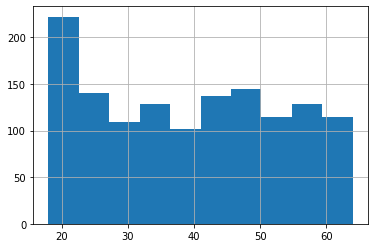

In [ ]:
age = dataset['age']
age.hist()

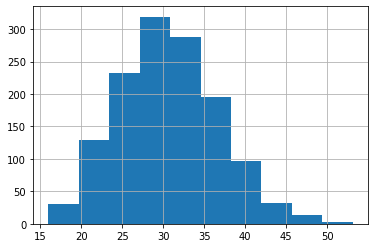

In [ ]:
dataset['bmi'].hist()

In [ ]:
datset_x = dataset.drop('expenses', axis = 1)
labels_y = dataset['expenses']

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(datset_x, labels_y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn import preprocessing
scaler_x = preprocessing.StandardScaler().fit(train_dataset)
train_dataset = scaler_x.transform(train_dataset)
test_dataset = scaler_x.transform(test_dataset)

In [ ]:
model1 = lm()
model1.fit(train_dataset, train_labels)

LinearRegression()

In [ ]:
mae_test = mean_absolute_error(test_labels, model1.predict(test_dataset))
mae_test

3933.3062578580716

In [ ]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha = 0.0005, random_state = 1)

In [ ]:
model2.fit(train_dataset, train_labels)

Lasso(alpha=0.0005, random_state=1)

In [ ]:
mean_absolute_error(test_labels, model2.predict(test_dataset))

3933.3062702127454

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor(n_estimators = 5000, n_jobs = -1, random_state = 0)

In [ ]:
ran_for.fit(train_dataset, train_labels)

RandomForestRegressor(n_estimators=5000, n_jobs=-1, random_state=0)

In [ ]:
mae_ran = mean_absolute_error(test_labels, ran_for.predict(test_dataset))
mae_ran

2557.6479517285343

In [ ]:
model = ran_for

Testing set Mean Abs Error: 2557.65 expenses
You passed the challenge. Great job!


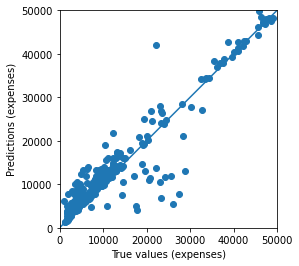

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae = mean_absolute_error(test_labels, ran_for.predict(test_dataset))

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
